In [9]:
import numpy as np
import time

In [5]:
def divide_matrix(A):
    """
    Input: a square matrix A of size n x n
    Output: four submatrices of A
    """
    n = len(A)
    A11 = A[:n//2, :n//2]
    A12 = A[:n//2, n//2:]
    A21 = A[n//2:, :n//2]
    A22 = A[n//2:, n//2:]
    return A11, A12, A21, A22
    

In [1]:
def StrassenAlgo(A, B):
    """
    Input: two square matrices A and B of size 2^k x 2^k for some integer k >= 1
    Output: the product of A and B
    """
    n = len(A)
    if n == 1:
        return A * B
    
    A11, A12, A21, A22 = divide_matrix(A)
    B11, B12, B21, B22 = divide_matrix(B)
    
    M1 = StrassenAlgo(A11 + A22, B11 + B22)
    M2 = StrassenAlgo(A21 + A22, B11)
    M3 = StrassenAlgo(A11, B12 - B22)
    M4 = StrassenAlgo(A22, B21 - B11)
    M5 = StrassenAlgo(A11 + A12, B22)
    M6 = StrassenAlgo(A21 - A11, B11 + B12)
    M7 = StrassenAlgo(A12 - A22, B21 + B22)

    AB = np.zeros((n, n))
    AB[:n//2, :n//2] = M1 + M4 - M5 + M7
    AB[:n//2, n//2:] = M3 + M5
    AB[n//2:, :n//2] = M2 + M4
    AB[n//2:, n//2:] = M1 + M3 - M2 + M6
    
    return AB
    
    
    
    

In [8]:
test_results = []
for N in range(2,4):
    for i in range(5):
        A = np.random.uniform(-1, 1, (2**N, 2**N))
        B = np.random.uniform(-1, 1, (2**N, 2**N))
        first = StrassenAlgo(A, B)
        second = A@B
        result = np.allclose(first, second, rtol=1e-9, atol=1e-11)
        test_results.append(result)
print(all(test_results))

True


In [18]:
strassen_avg_times = []
normal_avg_times = []
test_results = []
for N in range(2,10):
    strassen_times = []
    normal_times = []
    for i in range(2):
        A = np.random.uniform(-1, 1, (2**N, 2**N))
        B = np.random.uniform(-1, 1, (2**N, 2**N))
        strassen_time = time.time()
        first = StrassenAlgo(A, B)
        strassen_time = time.time() - strassen_time
        normal_time = time.time()
        second = A@B
        normal_time = time.time() - normal_time
        result = np.allclose(first, second, rtol=1e-9, atol=1e-11)
        test_results.append(result)
        strassen_times.append(strassen_time)
        normal_times.append(normal_time)
    strassen_avg_times.append(np.mean(strassen_times))
    normal_avg_times.append(np.mean(normal_times))


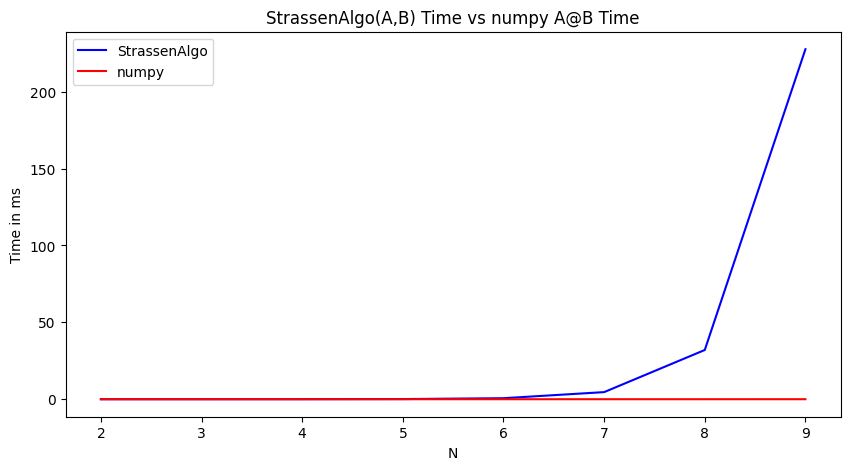

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(strassen_avg_times, label='StrassenAlgo', color='blue')
ax.plot(normal_avg_times, label='numpy', color='red')
xticks = np.arange(0,8)
xlabels = [i for i in range(2,10)]
ax.set_xticks(xticks, labels=xlabels)
ax.set_xlabel('N')
ax.set_ylabel('Time in ms')
ax.set_title('StrassenAlgo(A,B) Time vs numpy A@B Time')
ax.legend()
plt.show()
